# Comma police in Julia

Julia can read and write csv files as well.

The straight forward way is using `load()` and `save()`. Julia will try to guess the format of the file by its extension (e.g., if the file is called "blablab.csv" it will assume it is a csv file. `load()` can also load entire directories of files in one go: just provide the path to the directory. It will try to produce 

The Input and Output of Files is handled in genral by the package `FileIO`. You already have it if you have installed Queryverse in the previous labs. You can load it either directly (in "isolation"):

In [1]:
using Pkg

In [4]:
# using FileIO
Pkg.add("Queryverse")

    Updating registry at `C:\Users\thoma\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed Libiconv_jll ─ v1.16.1+1
   Installed Zstd_jll ───── v1.5.0+0
   Installed XML2_jll ───── v2.9.12+0
   Installed Queryverse ─── v0.7.0
    Updating `C:\Users\thoma\.julia\environments\v1.6\Project.toml`
  [612083be] + Queryverse v0.7.0
    Updating `C:\Users\thoma\.julia\environments\v1.6\Manifest.toml`
  [69666777] + Arrow v0.2.4
  [b99e7846] + BinaryProvider v0.5.10
  [5d742f6a] + CSVFiles v1.0.1
  [324d7699] + CategoricalArrays v0.8.3
  [6b39b394] + CodecZstd v0.7.0
  [743a1d0a] + DataTables v0.1.0
  [5721bf48] + DataVoyager v1.0.2
  [a1bb12fb] + Electron v3.1.2
  [89b67f3b] + ExcelFiles v1.0.0
  [c04bee98] + ExcelReaders v0.11.0
  [8f5d6c58] + EzXML v1.1.0
  [b675d258] + FeatherFiles v0.8.1
  [409f5150] + FeatherLib v0.2.0
  [53afe959] + FlatBuffers v0.5.4
  [f9f48841] + MemPool v0.2.0
  [d96e819e] +

or loading the full Queryverse. The Queryverse has very good documentation https://www.queryverse.org/, get familiar with it.

In [5]:
using Queryverse

and we load also the rest of the packages we need

In [6]:
using VegaDatasets, VegaLite

To write a csv is quite easy: pass a dataframe (or any  other format for tabular data) to `save()` specifying the name of the file you want to create:

In [7]:
dataset("cars") |>
  save("Data/cars.csv")

Uh, what happens there? Well, let's read. Apparently, the folder "Data" is not there. And indeed, it is not there, yet. If we start a cell with ";" then we can pass any shell command. We use this to create the folder we need.

In [10]:
; mkdir Data

mkdir: cannot create directory 'Data': File exists


And then we try again.

In [11]:
dataset("cars") |>
  save("Data/cars.csv")

Reading a csv requires to know where it is:

In [12]:
cars = load("Data/cars.csv")

Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
"""chevrolet chevelle malibu""",18.0,8,307.0,130,3504,12.0,"Date(""1970-01-01"")","""USA"""
"""buick skylark 320""",15.0,8,350.0,165,3693,11.5,"Date(""1970-01-01"")","""USA"""
"""plymouth satellite""",18.0,8,318.0,150,3436,11.0,"Date(""1970-01-01"")","""USA"""
"""amc rebel sst""",16.0,8,304.0,150,3433,12.0,"Date(""1970-01-01"")","""USA"""
"""ford torino""",17.0,8,302.0,140,3449,10.5,"Date(""1970-01-01"")","""USA"""
"""ford galaxie 500""",15.0,8,429.0,198,4341,10.0,"Date(""1970-01-01"")","""USA"""
"""chevrolet impala""",14.0,8,454.0,220,4354,9.0,"Date(""1970-01-01"")","""USA"""
"""plymouth fury iii""",14.0,8,440.0,215,4312,8.5,"Date(""1970-01-01"")","""USA"""
"""pontiac catalina""",14.0,8,455.0,225,4425,10.0,"Date(""1970-01-01"")","""USA"""
"""amc ambassador dpl""",15.0,8,390.0,190,3850,8.5,"Date(""1970-01-01"")","""USA"""


The ouput of `load()` is NOT a dataframe, but ... a CSVFiles. This is because Julia does not read ALL the file in memory, but it keeps on disk and access it as it needs it.

In [13]:
cars |>
 typeof

CSVFiles.CSVFile

Yet, the output is still tabular data, in particular an "IndexedTable" (in the Queryverse jargon), and so we can filer and operate on it as we do with dataframes:

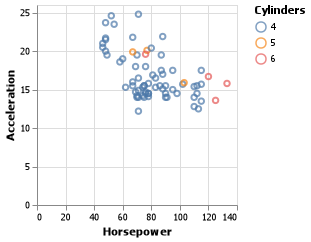

In [14]:
cars |>
  @filter(_.Origin=="Europe") |>
  @vlplot(:point, x=:Horsepower, y=:Acceleration, color="Cylinders:n")

And we can always transform it into a dataframe:

In [15]:
cars |>
  DataFrame |>
  describe

,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,Name,,amc ambassador brougham,,vw rabbit custom,0
2,Miles_per_Gallon,23.5146,9.0,23.0,46.6,8
3,Cylinders,5.47537,3,4.0,8,0
4,Displacement,194.78,68.0,151.0,455.0,0
5,Horsepower,105.082,46,95.0,230,6
6,Weight_in_lbs,2979.41,1613,2822.5,5140,0
7,Acceleration,15.5197,8.0,15.5,24.8,0
8,Year,,1970-01-01,,1982-01-01,0
9,Origin,,Europe,,USA,0


### beyond csv

`load()` is able to load a bunch of different formats: csv and excel files, but also SPSS, Stat and SAS files. And more. 

For the time being, `save()` is more limited and can save in csv and two special formats (feather and bedgraph).

For more details see here: http://www.david-anthoff.com/jl4ds/stable/fileio/#The-load-and-save-function-1

## Complicated csvs

If you find some nasty and complicated csv, which `load()` are not able to handle, the way out is using the dedicated package [CSV](http://juliadata.github.io/CSV.jl/stable/index.html#High-level-interface-1).

In [16]:
Pkg.add("CSV")

   Resolving package versions...
   Installed CSV ─ v0.8.5
    Updating `C:\Users\thoma\.julia\environments\v1.6\Project.toml`
  [336ed68f] + CSV v0.8.5
    Updating `C:\Users\thoma\.julia\environments\v1.6\Manifest.toml`
  [336ed68f] + CSV v0.8.5
  [91c51154] + SentinelArrays v1.3.5
Precompiling project...
  ✓ SentinelArrays
  ✓ CSV
  2 dependencies successfully precompiled in 15 seconds (109 already precompiled)


In [17]:
using CSV

The main functions here are `CSV.write()` to write a csv, `CSV.read()` to read a csv, and `CSV.validate()` to get information about why the reading of a csv file fails.

## Excelles

Julia handles excel files in a similar way that `readxl` in R does. The package in this case is `ExcelFiles` (see: https://github.com/queryverse/ExcelFiles.jl ).

In [18]:
Pkg.add("ExcelFiles")

   Resolving package versions...
    Updating `C:\Users\thoma\.julia\environments\v1.6\Project.toml`
  [89b67f3b] + ExcelFiles v1.0.0
  No Changes to `C:\Users\thoma\.julia\environments\v1.6\Manifest.toml`


In [19]:
using ExcelFiles

The main functions here are named similary to the CSV package.

# Your turn

Load a dataset from VegaDataset (e.g., `dataset("iris")`), do some wrangling, and write it to disk as a csv. Then read it back

In [20]:
# your code here.